In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from functools import reduce
import sys
sys.path.append('../')
from package_global_functions import *

# same function as in plot_evos.py
def getTimeEvosPath():
    extSSDpath = getExternalSSDpath()
    if os.path.exists(extSSDpath):
        path = extSSDpath + getProjectFoldername() + '/evo_to_stationary/time_evos_dif_cond'
    else:
        path = '/time_evos_dif_cond'
    return path

def get_avg_traj(dfs):
    df_avg = reduce(lambda a,b: a.add(b, fill_value=0), dfs)
    df_avg = df_avg/len(dfs)
    return df_avg

Text(0.2, 0.8, '$\\lambda = 0.0$')

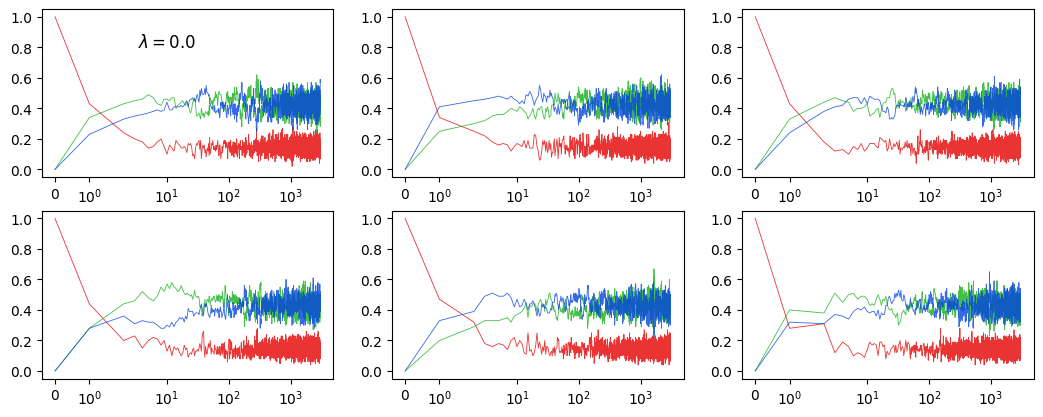

In [25]:
pi1, pi2, q, l, N = 0.3, 0.3, 10, 0.0, 100
folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q}_q2_{q}_l_{l}'
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]
df_avg = get_avg_traj(dfs)
Nplots = 6
fig, ax = plt.subplots(2, int(Nplots/2), figsize=(12.8, 4.8))
for i,df in enumerate(dfs[:Nplots]):
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f0'], alpha=0.8, lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f1'], alpha=0.8, lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f2'], alpha=0.8, lw=0.6, color='xkcd:blue')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xscale('symlog')
fig.text(0.2, 0.8, f'$\lambda = {l}$', fontsize=12)

Text(0.2, 0.8, '$\\lambda = 0.4$')

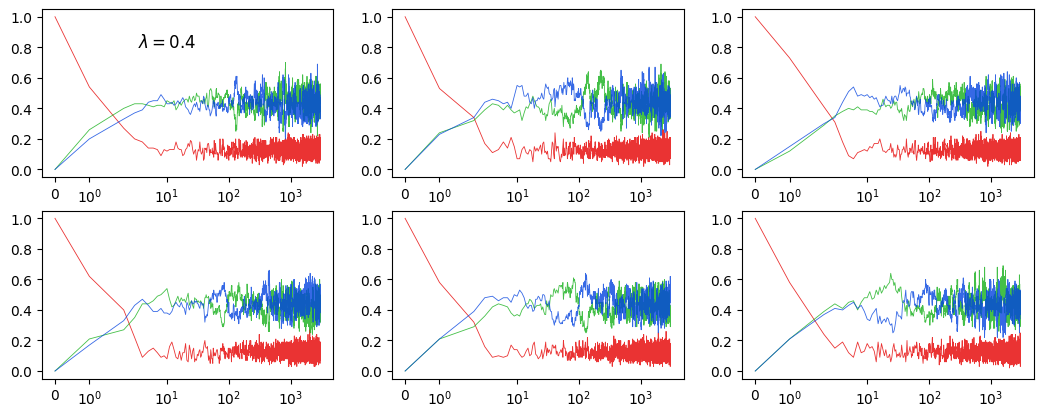

In [26]:
pi1, pi2, q, l, N = 0.3, 0.3, 10, 0.4, 100
folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q}_q2_{q}_l_{l}'
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]
df_avg = get_avg_traj(dfs)
Nplots = 6
fig, ax = plt.subplots(2, int(Nplots/2), figsize=(12.8, 4.8))
for i,df in enumerate(dfs[:Nplots]):
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f0'], alpha=0.8, lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f1'], alpha=0.8, lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f2'], alpha=0.8, lw=0.6, color='xkcd:blue')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xscale('symlog')
fig.text(0.2, 0.8, f'$\lambda = {l}$', fontsize=12)

Text(0.2, 0.8, '$\\lambda = 0.6$')

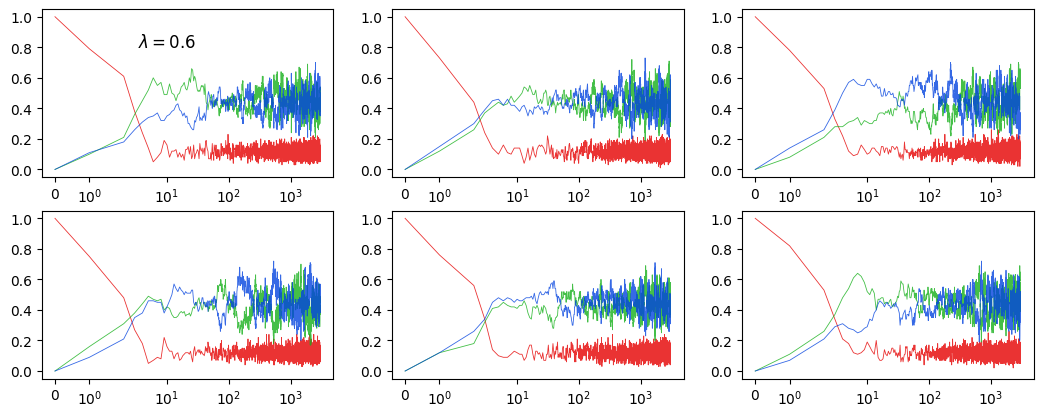

In [27]:
pi1, pi2, q, l, N = 0.3, 0.3, 10, 0.6, 100
folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q}_q2_{q}_l_{l}'
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]
df_avg = get_avg_traj(dfs)
Nplots = 6
fig, ax = plt.subplots(2, int(Nplots/2), figsize=(12.8, 4.8))
for i,df in enumerate(dfs[:Nplots]):
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f0'], alpha=0.8, lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f1'], alpha=0.8, lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f2'], alpha=0.8, lw=0.6, color='xkcd:blue')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xscale('symlog')
fig.text(0.2, 0.8, f'$\lambda = {l}$', fontsize=12)

Text(0.2, 0.8, '$\\lambda = 0.8$')

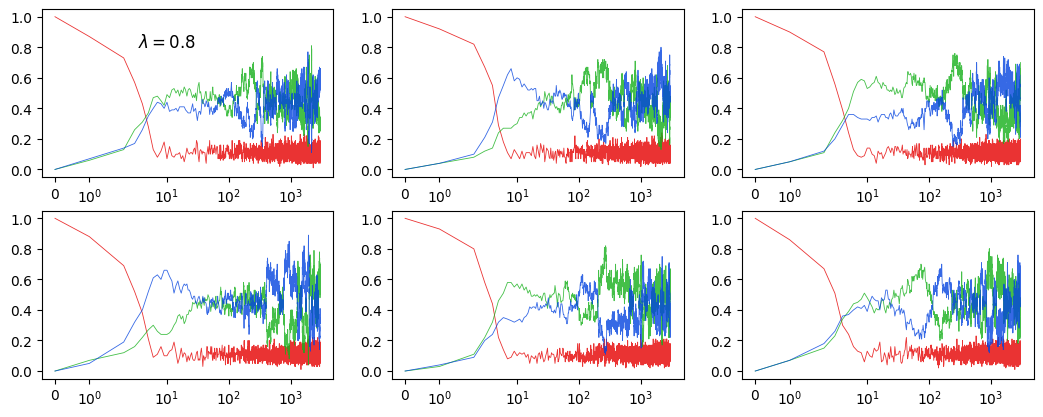

In [28]:
pi1, pi2, q, l, N = 0.3, 0.3, 10, 0.8, 100
folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q}_q2_{q}_l_{l}'
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]
df_avg = get_avg_traj(dfs)
Nplots = 6
fig, ax = plt.subplots(2, int(Nplots/2), figsize=(12.8, 4.8))
for i,df in enumerate(dfs[:Nplots]):
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f0'], alpha=0.8, lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f1'], alpha=0.8, lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f2'], alpha=0.8, lw=0.6, color='xkcd:blue')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xscale('symlog')
fig.text(0.2, 0.8, f'$\lambda = {l}$', fontsize=12)

Text(0.2, 0.8, '$\\lambda = 0.9$')

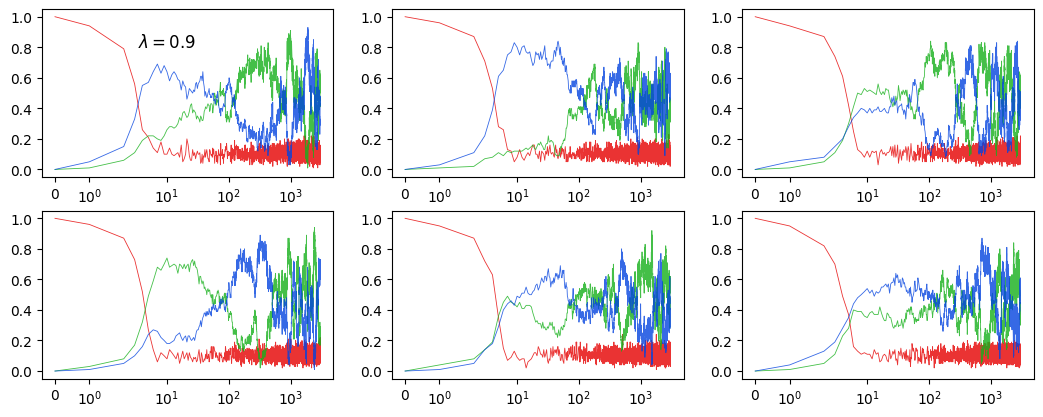

In [29]:
pi1, pi2, q, l, N = 0.3, 0.3, 10, 0.9, 100
folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q}_q2_{q}_l_{l}'
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]
df_avg = get_avg_traj(dfs)
Nplots = 6
fig, ax = plt.subplots(2, int(Nplots/2), figsize=(12.8, 4.8))
for i,df in enumerate(dfs[:Nplots]):
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f0'], alpha=0.8, lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f1'], alpha=0.8, lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f2'], alpha=0.8, lw=0.6, color='xkcd:blue')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xscale('symlog')
fig.text(0.2, 0.8, f'$\lambda = {l}$', fontsize=12)

Text(0.2, 0.8, '$\\lambda = 0.99$')

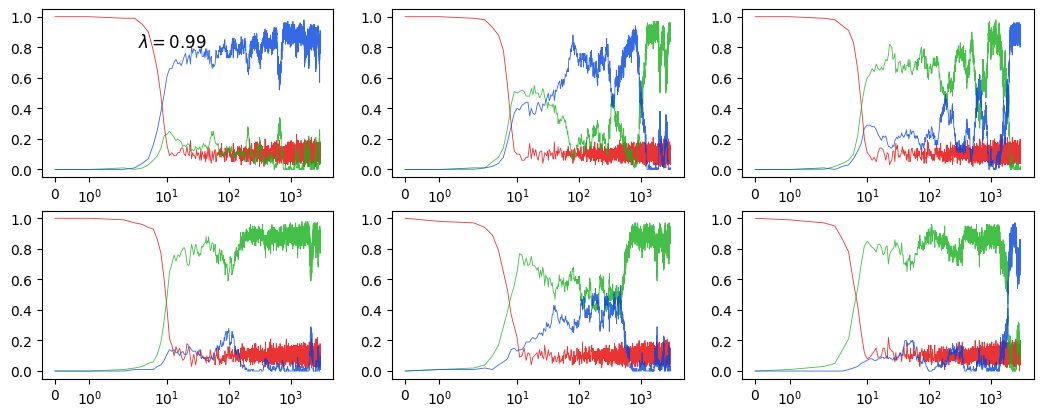

In [30]:
pi1, pi2, q, l, N = 0.3, 0.3, 10, 0.99, 100
folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q}_q2_{q}_l_{l}'
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]
df_avg = get_avg_traj(dfs)
Nplots = 6
fig, ax = plt.subplots(2, int(Nplots/2), figsize=(12.8, 4.8))
for i,df in enumerate(dfs[:Nplots]):
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f0'], alpha=0.8, lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f1'], alpha=0.8, lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f2'], alpha=0.8, lw=0.6, color='xkcd:blue')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xscale('symlog')
fig.text(0.2, 0.8, f'$\lambda = {l}$', fontsize=12)

Text(0.2, 0.8, '$\\lambda = 0.999$')

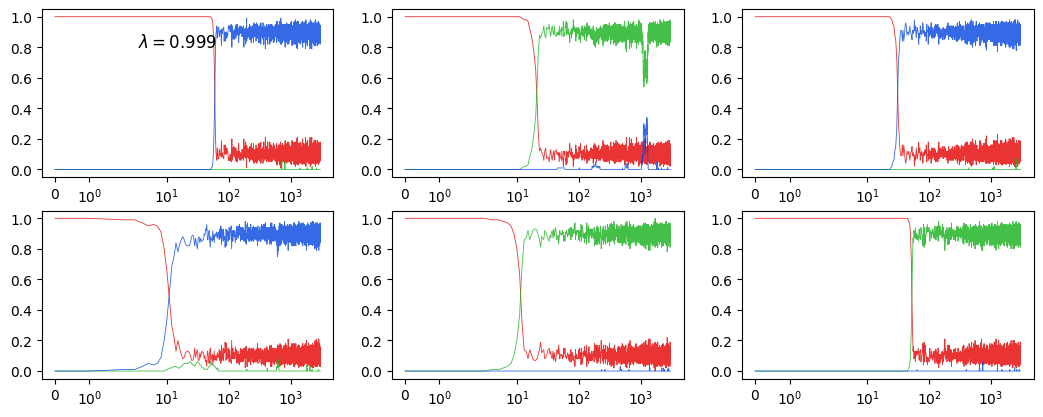

In [33]:
pi1, pi2, q, l, N = 0.3, 0.3, 10, 0.999, 100
folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q}_q2_{q}_l_{l}'
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]
df_avg = get_avg_traj(dfs)
Nplots = 6
fig, ax = plt.subplots(2, int(Nplots/2), figsize=(12.8, 4.8))
for i,df in enumerate(dfs[18:18+Nplots]):
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f0'], alpha=0.8, lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f1'], alpha=0.8, lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f2'], alpha=0.8, lw=0.6, color='xkcd:blue')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xscale('symlog')
fig.text(0.2, 0.8, f'$\lambda = {l}$', fontsize=12)